<a id="1"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Loading libraries</span>
</div>

In [1]:
import logging
import numpy
import numpy as np
import pandas as pd
from math import *
from datetime import datetime
from operator import itemgetter
from zipfile import ZipFile
from io import BytesIO
import pickle
from urllib.request import urlopen

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from numpy import inf
from scipy.stats import kurtosis, skew

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_squared_error



import warnings
warnings.filterwarnings('ignore')

from functions import *
from fair_func import *

In [2]:
from pandas.api.types import CategoricalDtype


<span style="float:right;"> [TOC](#TOC) </span>

----

<a id="2"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Loading and preparing the data</span>
</div>

In [3]:
data = pd.read_csv('RAIdata.csv')

----

<a id="3"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Exploring data</span>
</div>

In [4]:
data.shape

(61321, 206)

In [5]:
data["Default"].value_counts()

0.0    46752
1.0    14569
Name: Default, dtype: int64

In [6]:
data.head().T

,0,1,2,3,4
Unnamed: 0,0.000000,1.0000,2.000000,3.000000,4.0000
Age,54.000000,52.0000,28.000000,40.000000,31.0000
AppliedAmount,8505.000000,2230.0000,530.000000,1380.000000,530.0000
DebtToIncome,0.000000,0.0000,0.000000,0.000000,0.0000
ExpectedLoss,0.118622,0.0592,0.048764,0.071894,0.0437
...,...,...,...,...,...
WorkExperience_2To5Years,0.000000,1.0000,1.000000,0.000000,0.0000
WorkExperience_5To10Years,1.000000,0.0000,0.000000,1.000000,0.0000
WorkExperience_LessThan2Years,0.000000,0.0000,0.000000,0.000000,1.0000
WorkExperience_MoreThan25Years,0.000000,0.0000,0.000000,0.000000,0.0000


In [7]:
#pd.DataFrame(data.describe().T).to_csv('data_describe.csv')

<div class="alert alert-block alert-success">
<b>Inference:</b>
We can infer that the data has more 0's (False) when it comes to defaulter compared to 1's (True).  
Thus there are more non-defaulters than defaulters.
</div>

<span style="float:right;"> [TOC](#TOC) </span>

---

In [8]:
#0 if favourable [false, default = false]
#1 if unfavourable [true, default = True]
fav=0
unfav=int(not fav)

In [9]:
a='Gender_0.0' #Male
b='Education_5.0' #Higher Ed
c='Young' # Age group
d='HomeOwnershipType_1.0' #Owner 
e='HomeOwnershipType_8.0' #Mortgages
f='EmploymentStatus_5.0' #Entrepreneur
g="Tenant" #Tenant

i='LanguageCode_1' #Estonian
j='LanguageCode_2' #English
k="NrOfDependantslessthan3" #No of dependent less than 10 years
l='MaritalStatus_1.0' #Married
m='MaritalStatus_3.0' #Single
n='MaritalStatus_4.0' #Divorced

p="WrExLess10" #Work ex less than 10 years
q="WrExLess5" #Work ex less than 5 years


<div class="alert alert-block alert-info">
<b>Remember:</b> 

- Statistical Parity Difference should be between -0.1 and 0.1
- Disparate Impact should be between 0.90 and 1.10
- Negative sign shows that: the unprivileged group is worse in favourable outcome that privileged class (as the formula used it probability of unprivileged - probability of privileged), so in case you see a positive value, you may want to reconsider your choice of privileged and unprivileged groups <b>using the next two plots</b>
</div>


In [10]:
choice = 'dep_4_wl10' #'MaritalStatus_1.0'
pval = 0 #privileged : see the above heatmaps
upval = int(not pval) #Unprivileged
#['HomeOwnershipType_8.0', 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0', 'WrExLess10']

In [11]:
label_names=['Default']
protected_attribute_names=[choice]
privileged_groups=[{choice: pval}]
unprivileged_groups=[{choice: upval }]

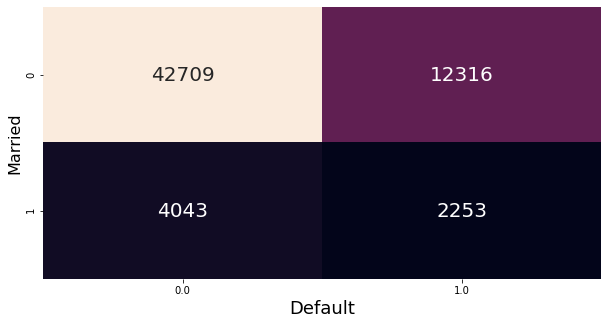

In [12]:
plt.subplots(figsize=(10,5))
plotdf=pd.crosstab(data['MaritalStatus_1.0'], data['Default'], rownames=['Divorced'])
ax=sns.heatmap(plotdf, annot=True, fmt='g', cbar=False, annot_kws={'size':20})    #axes.plot(vc)
plt.xlabel('Default', fontsize=18)
plt.ylabel('Married', fontsize=16)

plt.show()    #axes.plot(vc)
plt.show()

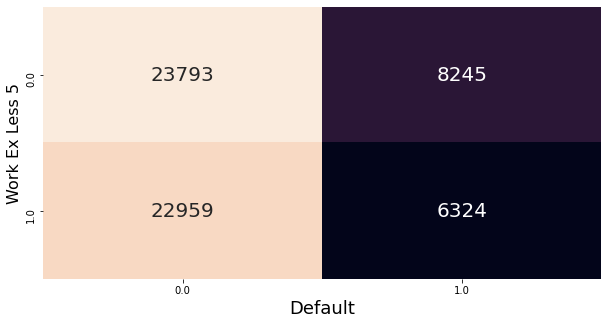

In [13]:
plt.subplots(figsize=(10,5))
plotdf=pd.crosstab(data['WrExLess5'], data['Default'], rownames=['Divorced'])
ax=sns.heatmap(plotdf, annot=True, fmt='g', cbar=False, annot_kws={'size':20})    #axes.plot(vc)
plt.xlabel('Default', fontsize=18)
plt.ylabel('Work Ex Less 5', fontsize=16)

plt.show()    #axes.plot(vc)
plt.show()

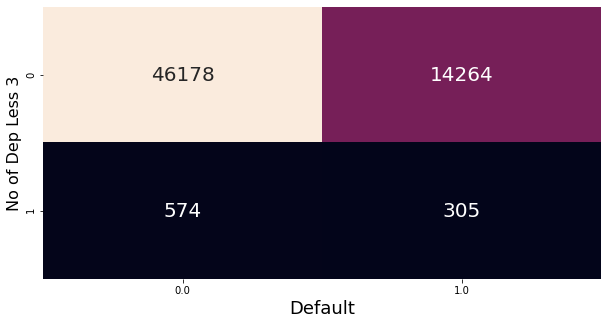

In [14]:
plt.subplots(figsize=(10,5))
plotdf=pd.crosstab(data['NrOfDependants_3'], data['Default'], rownames=['Divorced'])
ax=sns.heatmap(plotdf, annot=True, fmt='g', cbar=False, annot_kws={'size':20})    #axes.plot(vc)
plt.xlabel('Default', fontsize=18)
plt.ylabel('No of Dep Less 3', fontsize=16)

plt.show()    #axes.plot(vc)
plt.show()

In [15]:
choice = 'dep_4_wl10' #'MaritalStatus_1.0'
pval = 0 #privileged : see the above heatmaps
upval = int(not pval) #Unprivileged
#['HomeOwnershipType_8.0', 'MaritalStatus_1.0', 'MaritalStatus_3.0', 'MaritalStatus_4.0', 'WrExLess10']

In [16]:
data['dep_MS4_wex10'] = data[['NrOfDependantslessthan3','MaritalStatus_4.0', 'WrExLess10']].min(axis=1)

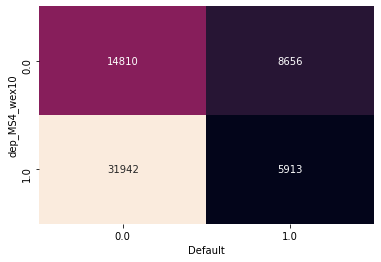

In [17]:
plotdf=pd.crosstab(data['dep_MS4_wex10'], data['Default'])
ax=sns.heatmap(plotdf, annot=True, fmt='g', cbar=False)    #axes.plot(vc)
plt.show()
#print (type(axes))


<a id="5"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Removing bias from data using reweighting technique</span>
</div>

(https://link.springer.com/content/pdf/10.1007%2Fs10115-011-0463-8.pdf)

The tuples in the training dataset are assigned weights. By carefully choosing the weights, the training dataset can be made discrimination-free w.r.t. ${S}$ without having to change any of the labels. The weights on the tuples can be used directly. 

*Note: Basic t-test that will reveal bias is the two-sample t test*

**Discrimination:** 

$$
\begin{align}
\frac{(X_{S}=advantageous | X_{Class}=positive)}{X_{S}=advantageous} - \frac{(X_{S}= disadvantageous | X_{Class}=positive)}{X_{S}= disadvantageous}
\end{align}
$$


**Weight:**
$$
\begin{align}
\frac{P_{expected}(S=X_{S} \ and \ Class=X_{Class})}{P_{observed}(S=X_{S} \ and \ Class=X_{Class})}
\end{align}
$$

Thus, there will be four categories of weights when:


- $X_{S}$ = advantageous, $X_{Class}$ = positive [Privileged and favourable]
- $X_{S}$ = advantageous, $X_{Class}$ = negative [Privileged and unfavourable]
- $X_{S}$ = disadvantageous, $X_{Class}$ = positive [Unprivileged and favourable]
- $X_{S}$ = disadvantageous, $X_{Class}$ = negative [Unprivileged and unfavourable]

<div class="alert alert-block alert-info">
<b>Remember:</b> 
Reweighing is one of those methods that has zero or less trade-off on accurcay of the algorithm. It can be also used for multi-class target variable and multi-level sensitive feature. Furthermore, it can be used for all types of supervised learning algorithms
</div>

In [18]:
def Reweighing1 (data, choice, target_feature, pval, upval, fav=0, unfav=1):


    dummy = np.repeat(1, len(data)) 
    data['dummy'] = dummy

    n = np.sum(data['dummy']) #Total number of instances
    sa = np.sum(data['dummy'][data[choice]==pval]) #Total number of privileged
    sd = np.sum(data['dummy'][data[choice]==upval]) #Total number of unprivileged
    ypos = np.sum(data['dummy'][data[target_feature]==fav]) #Total number of favourable
    yneg = np.sum(data['dummy'][data[target_feature]==unfav]) #Total number of unfavourable
    
    data_sa_ypos = data[(data[choice]==pval) & (data[target_feature]==fav)] # priviliged and favourable
    data_sa_yneg = data[(data[choice]==pval) & (data[target_feature]==unfav)] # priviliged and unfavourable
    data_sd_ypos = data[(data[choice]==upval) & (data[target_feature]==fav)] # unpriviliged and favourable
    data_sd_yneg = data[(data[choice]==upval) & (data[target_feature]==unfav)] # unpriviliged and unfavourable

    sa_ypos = np.sum(data_sa_ypos['dummy']) #Total number of privileged and favourable
    sa_yneg = np.sum(data_sa_yneg['dummy']) #Total number of privileged and unfavourable
    sd_ypos = np.sum(data_sd_ypos['dummy']) #Total number of unprivileged and favourable
    sd_yneg = np.sum(data_sd_yneg['dummy']) #Total number of unprivileged and unfavourable

    w_sa_ypos= (ypos*sa) / (n*sa_ypos) #weight for privileged and favourable
    w_sa_yneg = (yneg*sa) / (n*sa_yneg) #weight for privileged and unfavourable
    w_sd_ypos = (ypos*sd) / (n*sd_ypos) #weight for unprivileged and favourable
    w_sd_yneg = (yneg*sd) / (n*sd_yneg) #weight for unprivileged and unfavourable

    datatest=data #.copy()
    
    print (w_sa_ypos, w_sa_yneg, w_sd_ypos, w_sd_yneg)
    
    DiscriminationBefore=(sa_ypos/sa)-(sd_ypos/sd)
    DiscriminationAfter=(sa_ypos/sa * w_sa_ypos)-(sd_ypos/sd * w_sd_ypos)


    print (DiscriminationBefore, DiscriminationAfter)
    
    datatest['NewWeights']= np.repeat(999, len(datatest)) 
    datatest.loc[(datatest[choice]==pval) & (datatest[target_feature]==fav), 'NewWeights'] = w_sa_ypos
    datatest.loc[(datatest[choice]==pval) & (datatest[target_feature]==unfav), 'NewWeights'] = w_sa_yneg
    datatest.loc[(datatest[choice]==upval) & (datatest[target_feature]==fav), 'NewWeights'] = w_sd_ypos
    datatest.loc[(datatest[choice]==upval) & (datatest[target_feature]==unfav), 'NewWeights'] = w_sd_yneg

    return datatest['NewWeights']

In [19]:
#data['dep_MS4_wex10'] = data[['NrOfDependantslessthan3','MaritalStatus_4.0', 'WrExLess10']].min(axis=1)
#data['Combined_protected_group'] = np.where(((data['WrExLess10'] == 0) & (data['MaritalStatus_4.0'] == 0) | (data['NrOfDependantslessthan3'] == 0)),0, 1)
data['Combined_protected_group'] = np.where((data['WrExLess10'] == 0) & (data['MaritalStatus_4.0'] == 0),0, 1)

choice = 'Combined_protected_group'#'Combined_protected_group' #'NrOfDependantslessthan3'
pval = 1
upval = 0
#NrOfDependantslessthan3  WrExLess10 MaritalStatus_1.0 'MaritalStatus_3.0'
# 'MaritalStatus_4.0', 'dep_MS4_wex10'
# dep_MS4_wex10

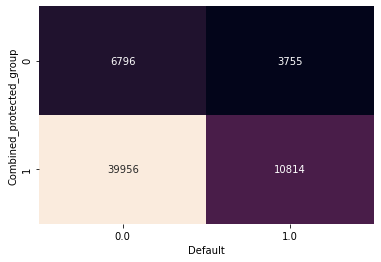

In [20]:
plotdf=pd.crosstab(data[choice], data['Default'])
ax=sns.heatmap(plotdf, annot=True, fmt='g', cbar=False)    #axes.plot(vc)
plt.show()

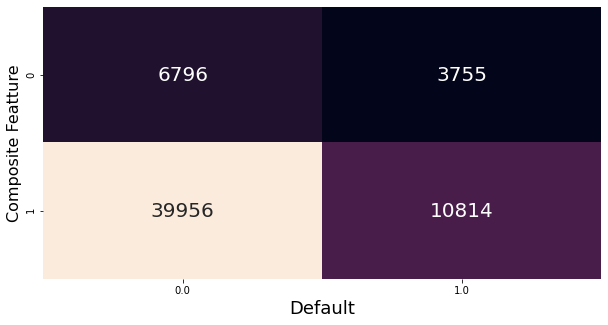

In [21]:
plt.subplots(figsize=(10,5))
plotdf=pd.crosstab(data[choice], data['Default'])
ax=sns.heatmap(plotdf, annot=True, fmt='g', cbar=False, annot_kws={'size':20})    #axes.plot(vc)
plt.xlabel('Default', fontsize=18)
plt.ylabel('Composite Featture', fontsize=16)

plt.show()    #axes.plot(vc)
plt.show()

In [22]:
target_feature='Default'

In [23]:
dummy = np.repeat(1, len(data)) 
data['dummy'] = dummy
n = np.sum(data['dummy']) #Total number of instances

In [24]:
fav

0

In [25]:
sa = np.sum(data['dummy'][data[choice]==pval]) #Total number of privileged
sd = np.sum(data['dummy'][data[choice]==upval]) #Total number of unprivileged
ypos = np.sum(data['dummy'][data[target_feature]==fav]) #Total number of favourable
yneg = np.sum(data['dummy'][data[target_feature]==unfav]) #Total number of unfavourable

print("Total Advantegous: {}, Total Disdvantegous: {}, Total Favourable: {}, Total Unavourable: {}"
      .format(sa, sd, ypos, yneg))

Total Advantegous: 50770, Total Disdvantegous: 10551, Total Favourable: 46752, Total Unavourable: 14569


In [26]:
data_sa_ypos = data[(data[choice]==pval) & (data[target_feature]==fav)] # priviliged and favourable
data_sa_yneg = data[(data[choice]==pval) & (data[target_feature]==unfav)] # priviliged and unfavourable
data_sd_ypos = data[(data[choice]==upval) & (data[target_feature]==fav)] # unpriviliged and favourable
data_sd_yneg = data[(data[choice]==upval) & (data[target_feature]==unfav)] # unpriviliged and unfavourable

In [27]:
sa_ypos = np.sum(data_sa_ypos['dummy']) #Total number of privileged and favourable
sa_yneg = np.sum(data_sa_yneg['dummy']) #Total number of privileged and unfavourable
sd_ypos = np.sum(data_sd_ypos['dummy']) #Total number of unprivileged and favourable
sd_yneg = np.sum(data_sd_yneg['dummy']) #Total number of unprivileged and unfavourable

print("Total number of the Advantaged and Favourable Group: {}".format(sa_ypos))
print("Total number of Advantaged and Unfavourable Group: {}".format(sa_yneg))
print("Total number of Disadvantaged and Favourable Group: {}".format(sd_ypos))
print("Total number of Disadvantaged and Unfavourable Group: {}".format(sd_yneg))


Total number of the Advantaged and Favourable Group: 39956
Total number of Advantaged and Unfavourable Group: 10814
Total number of Disadvantaged and Favourable Group: 6796
Total number of Disadvantaged and Unfavourable Group: 3755


In [28]:
w_sa_ypos= (ypos*sa) / (n*sa_ypos) #weight for privileged and favourable
w_sa_yneg = (yneg*sa) / (n*sa_yneg) #weight for privileged and unfavourable
w_sd_ypos = (ypos*sd) / (n*sd_ypos) #weight for unprivileged and favourable
w_sd_yneg = (yneg*sd) / (n*sd_yneg) #weight for unprivileged and unfavourable

print("Weights for the Advantaged and Favourable Group: {}".format(w_sa_ypos))
print("Weights for the Advantaged and Unfavourable Group: {}".format(w_sa_yneg))
print("Weights for the Disadvantaged and Favourable Group: {}".format(w_sd_ypos))
print("Weights for the Disadvantaged and Unfavourable Group: {}".format(w_sd_yneg))


Weights for the Advantaged and Favourable Group: 0.968759835195764
Weights for the Advantaged and Unfavourable Group: 1.1154274112186104
Weights for the Disadvantaged and Favourable Group: 1.183671575179231
Weights for the Disadvantaged and Unfavourable Group: 0.6675813515531147


In [29]:
datatest=data #.copy()

DiscriminationBefore=(sa_ypos/sa)-(sd_ypos/sd)
DiscriminationAfter=(sa_ypos/sa * w_sa_ypos)-(sd_ypos/sd * w_sd_ypos)

print("Discrimination Before: {}, Discrimination After: {}".format(abs(DiscriminationBefore),
                                                                           abs(DiscriminationAfter)))

Discrimination Before: 0.14289063389212253, Discrimination After: 0.0


In [30]:
datatest['Weights']= np.repeat(999, len(datatest)) 
datatest.loc[(datatest[choice]==pval) & (datatest[target_feature]==fav), 'Weights'] = w_sa_ypos
datatest.loc[(datatest[choice]==pval) & (datatest[target_feature]==unfav), 'Weights'] = w_sa_yneg
datatest.loc[(datatest[choice]==upval) & (datatest[target_feature]==fav), 'Weights'] = w_sd_ypos
datatest.loc[(datatest[choice]==upval) & (datatest[target_feature]==unfav), 'Weights'] = w_sd_yneg
datatest['Weights'].head()

0    0.96876
1    0.96876
2    0.96876
3    0.96876
4    0.96876
Name: Weights, dtype: float64

----

<a id="5a"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:1.25em;">Model development with and without weights</span>
</div>

**Missing value impuation for modelling**

In [31]:
datatest['MonthlyPayment'].fillna((datatest['MonthlyPayment'].mean()), inplace=True)
datatest['ExpectedLoss'].fillna((datatest['ExpectedLoss'].mean()), inplace=True)
datatest['ProbabilityOfDefault'].fillna((datatest['ProbabilityOfDefault'].mean()), inplace=True)
datatest['DebtToIncome'].fillna((datatest['DebtToIncome'].mean()), inplace=True)
datatest['FreeCash'].fillna((datatest['FreeCash'].mean()), inplace=True)
datatest['LossGivenDefault'].fillna(0, inplace=True)

In [32]:
target=['Default']

In [33]:
x=datatest.drop(columns=['Age', 'dummy','Default'])
y=datatest['Default']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=6666)

In [35]:
X_train_weights=X_train['Weights']
X_test_weights=X_test['Weights']

X_train1=X_train.drop(columns=["Weights"])
X_test1=X_test.drop(columns=["Weights"])


**Model without weights**

In [36]:
clf_wow = LogisticRegression(random_state=0, solver='lbfgs',
                              multi_class='ovr').fit(X_train1, y_train)


In [37]:
y_pred_wow=clf_wow.predict(X_test1)
y_pred_prob_wow=clf_wow.predict_proba(X_test1)[:,0]

In [38]:
choice

'Combined_protected_group'

**Total accuracy of the model**

In [39]:
print("Accuracy of the model without weights:", clf_wow.score(X_test1, y_test))

Accuracy of the model without weights: 0.7591998695439474


**Accuracy difference between privileged and unprivileged group**

In [40]:
A_wow=clf_wow.score(X_test1[X_test1[choice]==0], y_test[X_test1[choice]==0]) #pval = 0 is Priviliged
B_wow=clf_wow.score(X_test1[X_test1[choice]==1], y_test[X_test1[choice]==1]) #pval = 1 is Unpriviliged
print("Accuracy difference between two groups:", abs(B_wow-A_wow)*100, "%")

Accuracy difference between two groups: 14.819843910142861 %


**Model with weights**

<div class="alert alert-block alert-info">
<b>Remember:</b> Pass your sample weights obtained from reweighing as sample weights to training model.     

<i>If we have a generic learning algorithm, increasing the sample weight should increase the effect of 
training on the sample.   
e.g. if we have a batched loss, instead of a sum over the batch we would do a weighted sum so higher weighted 
samples dominate the loss.  
In most cases, it is as simple as weighing the loss function, such that more important (or perhaps rarer) observations contribute more strongly to the loss and vice-versa</i>
</div>

In [41]:
clf_ww = LogisticRegression(random_state=0, solver='lbfgs',
                              multi_class='ovr').fit(X_train1, y_train, sample_weight=X_train_weights)


In [42]:
y_pred_ww = clf_ww.predict(X_test1)
y_pred_prob_ww = clf_ww.predict_proba(X_test1)[:,0]

**Total accuracy of the model with weights**

In [43]:
print("Accuracy of the model with weights:", clf_ww.score(X_test1, y_test))

Accuracy of the model with weights: 0.7614284937761592


**Accuracy difference between privileged and unprivileged group (model with weights)**

In [44]:
A_ww=clf_ww.score(X_test1[X_test1[choice]==0], y_test[X_test1[choice]==0])
B_ww=clf_ww.score(X_test1[X_test1[choice]==1], y_test[X_test1[choice]==1])
print("Accuracy difference between two groups:", abs(B_ww-A_ww)*100, "%" )

Accuracy difference between two groups: 13.550071515714624 %


<div class="alert alert-block alert-success">
<b>Inference:</b>
The overall accuracy of models with weights (weights generated by reweighing algorithm) has improved by few points while the overall accuracy difference between privileged group and unprivileged group has become narrower. A win-win situation
</div>

### Various other accuracy metrics before and after reweighing

In [45]:
model_perf=[model_metrics(y_test, y_pred_prob_ww, y_pred_prob_wow, 
                          y_pred_ww, y_pred_wow, X_test1)]

headers=["AUC", "Gini", "Avg Precision Score", "Precision", "Sensitivity", "False Negative Rate", 
         "F1 Score", "Total Cost"]


#full_metric={'With Weights':B, 
#             'Without_Weights':list(ww[0]), 'Without_Weights':list(wow[0])}

#compare_table=pd.DataFrame.from_dict(ww_wow)

B = list(model_perf[0])[:len(list(model_perf[0]))//2]
C = list(model_perf[0])[len(list(model_perf[0]))//2:]


model_table={'Metrics':headers, 
             'With_Weights':B, 'Without_Weights':C}

model_table_df=pd.DataFrame.from_dict(model_table)
model_table_df.loc[8] = ['Total Cost (in Mn)', model_table_df.iloc[7,1]/10000000, model_table_df.iloc[7,2]/10000000]
#model_table_df

In [46]:
model_table_df

,Metrics,With_Weights,Without_Weights
0,AUC,3.670133e-01,3.551230e-01
1,Gini,-2.659734e-01,-2.897541e-01
2,Avg Precision Score,2.520993e-01,2.566500e-01
3,Precision,5.210526e-01,4.808576e-01
4,Sensitivity,4.494892e-02,7.128263e-02
5,False Negative Rate,9.550511e-01,9.287174e-01
6,F1 Score,8.275862e-02,1.241597e-01
7,Total Cost,1.389500e+06,1.464600e+06
8,Total Cost (in Mn),1.389500e-01,1.464600e-01


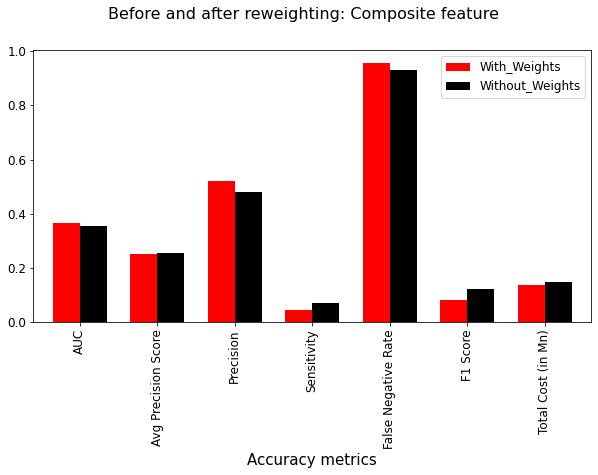

In [47]:
#plt.clf()
#plt.figure()
#Married, singlr, divorced

txt='Composite feature'

ax = model_table_df.iloc[[0,2,3,4,5,6,8],:].plot.bar(x='Metrics', rot=90, width = 0.7, 
                                                       color=['red', 'black'], figsize=(10,5), fontsize=12)
plt.suptitle('Before and after reweighting: {}'.format(txt),  fontsize=16, y=1)



patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right', fontsize=12)

ax.set_xlabel('Accuracy metrics', fontsize=15)


#plt.savefig('BnAR.svg', format='svg', dpi=500, bbox_inches='tight') #,
#plt.savefig('BnAR.png', format='png', dpi=500, bbox_inches='tight')
#beingsaved = plt.figure()
#beingsaved.savefig('BnAR.eps', format='eps', dpi=500)

plt.show()

<div class="alert alert-block alert-success">
<b>Inference:</b>
After using weights (generated from reweighing algorithm) metrics like AUC, precision, false negative rate has increased while gini, sensitivity, F1 score and cost has decreased significantly.
    
<b> PS: Cost here is 700 for each FP and 300 for each FN</b>
</div>

In [48]:
ww=[perf_metrics(y_test, y_pred_prob_ww, y_pred_ww, X_test1, choice, pval, upval)]
wow=[perf_metrics(y_test, y_pred_prob_wow, y_pred_wow, X_test1, choice, pval, upval)]
headers=["AUC", "Avg Precision", "Eq Oppo", "Eq Of Odds", "Precision", 
         "Demo Parity", "Avg Odds Diff", "Pred Equality", "Treatment Equality", "Pred Parity",
         "Cost Diff", "Total Cost"]

In [49]:
ww_wow={'Metrics':headers, 
             'With_Weights':list(ww[0]), 'Without_Weights':list(wow[0])}

compare_table=pd.DataFrame.from_dict(ww_wow)
compare_table.loc[12] = ['Total Cost (in Mn)', compare_table.iloc[11,1]/10000000, compare_table.iloc[11,2]/10000000]

In [50]:
compare_table

,Metrics,With_Weights,Without_Weights
0,AUC,9.172845e-02,1.047062e-01
1,Avg Precision,1.553813e-01,1.590184e-01
2,Eq Oppo,3.551391e-02,6.767527e-02
3,Eq Of Odds,6.909327e-02,1.414302e-01
4,Precision,1.017520e-01,1.220595e-01
5,Demo Parity,3.971582e-02,7.951927e-02
6,Avg Odds Diff,3.590043e-02,7.260213e-02
7,Pred Equality,3.628695e-02,7.752899e-02
8,Treatment Equality,2.352778e+01,1.520147e+01
9,Pred Parity,1.017520e-01,1.220595e-01


#### Difference in metrics (accuracy and fairness) between two groups before and after

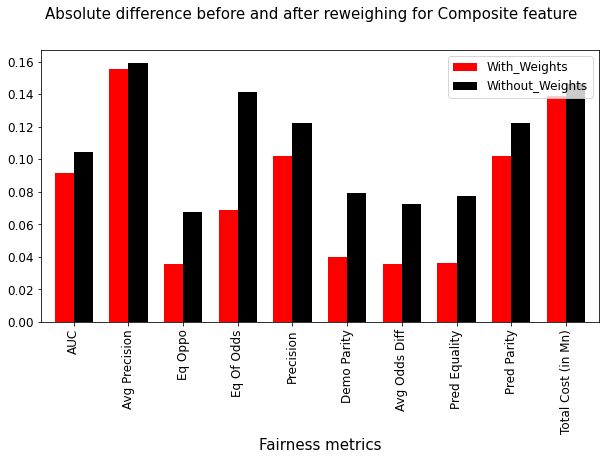

In [51]:
ax = compare_table.iloc[[0,1,2,3,4,5,6,7,9,12],:].plot.bar(x='Metrics', rot=90, width = 0.7, color=['red', 'black'], 
                                                           figsize=(10,5), fontsize=12)
plt.suptitle('Absolute difference before and after reweighing for {}'.format(txt),  
             fontsize=15, y=1)




patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right', fontsize=12)


ax.set_xlabel('Fairness metrics', fontsize=15)


#plt.savefig('ADF.svg', format='svg', dpi=500, bbox_inches='tight')
#plt.savefig('ADF.png', format='png', dpi=500, bbox_inches='tight')

#beingsaved = plt.figure()
#beingsaved.savefig('ADF.eps', format='eps', dpi=500)


plt.show()

<div class="alert alert-block alert-success">
<b>Inference:</b>
It can be seen that by using weights (as generated by reweighing technique) almost all fairness metrics are performing better than in the case of model without weights.    
Equality of opportunity, predictive parity and predictive equality has the best result as it has improved drastically. In terms of delta, equality of odds has shown maximum improvement
</div>

<a id="6"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:2em;">Accuracy-cost-fairness trade-off</span>
</div>

<a id="6a"> </a> 

<div class="alert alert-block alert-warning">
<span style="font-family:Futura Next; font-size:1.25em;">Calibrating across single threshold</span>
</div>

In [52]:
thresholds = np.arange(0, 1.01, 0.01)

In [53]:
#Higher probablity is 0 in binary
#Lower probablity is 1 in binary

In [54]:
EOpp, EOdds, demo_parity, AOD, p_eq, TE, pp, TNR, precision, FPR, f1, roc, sensitivity, fnr, fp, fn, cost = on_same_threshold(X_test1, y_test, choice, y_pred_prob_wow, pval, upval)

In [55]:
#EOpp, EOdds, demo_parity, AOD, p_eq, TE, pp, TNR, precision, FPR, f1, roc, sensitivity, fnr, fp, fn, cost = on_same_threshold(X_test1, y_test, choice, y_pred_prob_ww, pval, upval)

In [56]:
cost = [x / 100000 for x in cost]

same_thresholds={'Threshold':thresholds, 
             'Eq of Opportunity':EOpp, 'Eq of Odds':EOdds, 'Demographic Parity': demo_parity,
                 'Avg Odds':AOD, 'Pred equality':p_eq, 'Treatment eq':TE, 'Pred Parity':pp,
                 'True Negative Rate': TNR, 'Precision': precision, 'False Positive Rate':FPR, 
                 "F1": f1, "Area Under Curve":roc , "Sensitivity":sensitivity, "False Negative Rate":fnr,
                 "FP":fp, "FN":fn,
                 'Cost':cost}

same_thresholds_table=pd.DataFrame.from_dict(same_thresholds)
same_thresholds_table = same_thresholds_table.fillna(0)
#same_thresholds_table.tail(10)

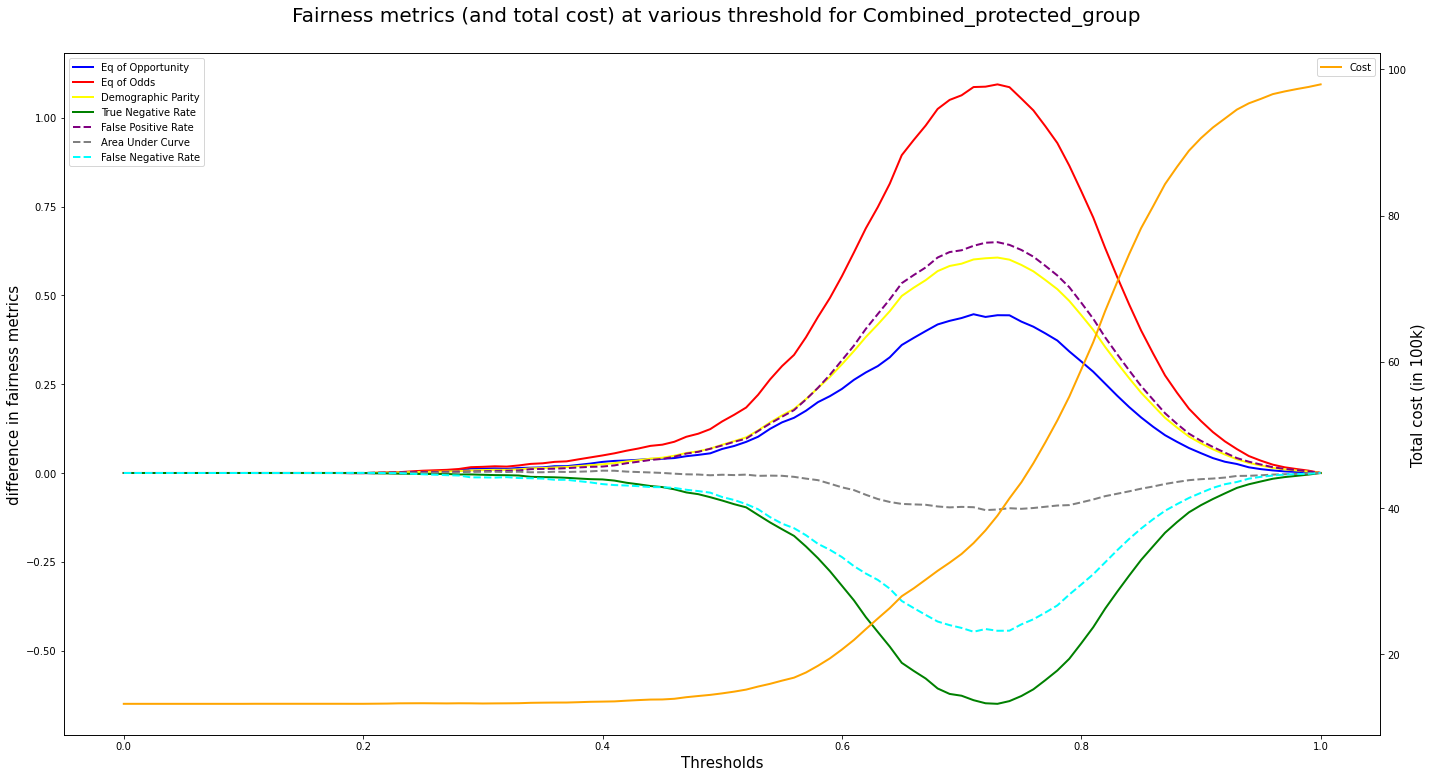

In [57]:
#plt.figure()

fig, ax1 = plt.subplots(figsize=(20,10))

fig.suptitle('Fairness metrics (and total cost) at various threshold for {}'.format(choice), fontsize=20, y=1.05)


ax1.plot( 'Threshold', 'Eq of Opportunity', data=same_thresholds_table, marker='', color='blue', linewidth=2)
ax1.plot( 'Threshold', 'Eq of Odds', data=same_thresholds_table, marker='', color='red', linewidth=2)
ax1.plot( 'Threshold', 'Demographic Parity', data=same_thresholds_table, marker='', color='yellow', linewidth=2)




#ax1.plot( 'Threshold', 'Avg Odds', data=same_thresholds_table, marker='', color='orange', linewidth=2)
#ax1.plot( 'Threshold', 'Pred equality', data=same_thresholds_table, marker='', color='purple', linewidth=2)
#ax1.plot( 'Threshold', 'Treatment eq', data=same_thresholds_table, marker='', color='yellow', linewidth=2)
#ax1.plot( 'Threshold', 'Pred Parity', data=same_thresholds_table, marker='', color='magenta', linewidth=2)



ax1.plot( 'Threshold', 'True Negative Rate', data=same_thresholds_table, marker='', color='green', linewidth=2)
#ax1.plot( 'Threshold', 'Precision', data=same_thresholds_table, marker='', color='black', linewidth=2)
ax1.plot( 'Threshold', 'False Positive Rate', data=same_thresholds_table, marker='', linestyle='--', color='purple', linewidth=2)
#ax1.plot( 'Threshold', 'F1', data=same_thresholds_table, marker='', color='grey', linewidth=2)
ax1.plot( 'Threshold', 'Area Under Curve', data=same_thresholds_table, marker='', linestyle='--', color='grey', linewidth=2)
#ax1.plot( 'Threshold', 'Sensitivity', data=same_thresholds_table, marker='', linestyle='--', color='blue', linewidth=2)
ax1.plot( 'Threshold', 'False Negative Rate', data=same_thresholds_table, marker='', linestyle='--', color='cyan', linewidth=2)



#ax1.plot( 'Threshold', 'FP', data=same_thresholds_table, marker='', color='black', linewidth=2)
#ax1.plot( 'Threshold', 'FN', data=same_thresholds_table, marker='', color='black', linewidth=2)





ax2 = ax1.twinx() 
ax2.plot( 'Threshold', 'Cost', data=same_thresholds_table, marker='', color='orange', linewidth=2)



patches, labels = ax1.get_legend_handles_labels()
ax1.legend(patches, labels, loc='upper left', fontsize=10)

patches, labels = ax2.get_legend_handles_labels()
ax2.legend(patches, labels, loc='upper left', fontsize=14)


ax1.set_ylabel('difference in fairness metrics', fontsize=15)
ax2.set_ylabel('Total cost (in 100k)', fontsize=15)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()

ax1.set_xlabel('Thresholds', fontsize=15)


plt.show()
#plt.clf()

<div class="alert alert-block alert-success">
<b>Inference:</b>
The cost is minimum at lower threshold and increase significantly after 0.80.         
The fairness metrics has acceptable values every where except for thresholds between 0.60-0.80.         
The accuracy difference between two classes in minimum everywhere except for thresholds between 0.60-0.80.
Thus, there seems a very distinct trade-off between fairness-cost-accuracy.    
In order to minimize cost, maximize accuracy and maintain fairness, the best range of threshold would be between 0.40-0.60 
</div>